In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import os
import io
import geopandas as gpd
import seaborn as sns
# suppress warning
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
# display all columns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Step 1: Get the rental price data**

In [5]:
link1 = "/content/drive/My Drive/X999/medianAskingRent_All.csv"

In [6]:
rent_df = pd.read_csv(link1)

In [9]:
rent_df.areaType.unique()

array(['submarket', 'neighborhood', 'borough', 'city'], dtype=object)

In [13]:
rent_df.shape

(198, 186)

In [10]:
submarket = rent_df[rent_df.areaType == 'submarket']

In [11]:
submarket.shape

(15, 186)

In [15]:
submarket.head()
# means an area that does not fall into any category. Does not affect our analysis.

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3015.0,3100.0,3100.0,3200.0,3195.0,3198.0,3400.0,3495.0,3450.0,3400.0,3350.0,3395.0,3300.0,3300.0,3378.0,3400.0,3375.0,3495.0,3600.0,3650.0,3550.0,3495.0,3450.0,3450.0,3500.0,3500.0,3550.0,3550.0,3500.0,3550.0,3610.0,3600.0,3650.0,3650.0,3510.0,3500.0,3500.0,3500.0,3500.0,3500.0,3500.0,3550.0,3650.0,3650.0,3695.0,3600.0,3615.0,3600.0,3600.0,3650.0,3645.0,3595.0,3595.0,3595.0,3645.0,3600.0,3600.0,3600.0,3600.0,3641.0,3650.0,3700.0,3750.0,3700.0,3700.0,3769.0,3795.0,3800.0,3750.0,3770.0,3700.0,3700.0,3750.0,3795.0,3800.0,3850.0,3880.0,3795.0,3795.0,3750.0,3700.0,3650.0,3650.0,3700.0,3695.0,3700.0,3785.0,3723.0,3725.0,3700.0,3653.0,3662.0,3673.0,3620.0,3650.0,3750.0,3735.0,3750.0,3837.0,3800.0,3795.0,3800.0,3825.0,3800.0,3850.0,3799.0,3800.0,3850.0,3800.0,3938.0,4000.0,4050.0,4000.0,3995.0,4000.0,4050.0,4050.0,4000.0,4000.0,3999.0,3995.0,3851.0,3700.0,3605.0,3500.0,3395.0,3295.0,3200.0,3140.0,3150.0,3150.0,3195.0,3200.0,3215.0,3350.0,3595.0,3800.0,4000.0,4195.0,4300.0,4361.0,4400.0,4500.0,4595.0,4595.0,4725.0,4800.0,4770.0,4800.0,4800.0,4875.0,4850.0,4795.0,4800.0,4827.0,4950.0,4800.0,4875.0,4950.0,4950.0,4895.0,4811.0,4848.0,4700.0,4700.0,4750.0,4800.0,4850.0,4895.0,4953.0,5000.0,4995.0,4950.0,4900.0,4900.0,4925.0,4895.0,4902.0,5000.0,5000.0,5000.0
1,All Midtown,Manhattan,submarket,2875.0,2800.0,2800.0,2850.0,2895.0,2950.0,3000.0,3000.0,3100.0,3100.0,3150.0,3150.0,3155.0,3195.0,3195.0,3200.0,3250.0,3300.0,3328.0,3300.0,3343.0,3375.0,3395.0,3350.0,3300.0,3250.0,3250.0,3300.0,3395.0,3395.0,3395.0,3400.0,3400.0,3400.0,3440.0,3450.0,3400.0,3400.0,3400.0,3390.0,3350.0,3395.0,3350.0,3395.0,3400.0,3399.0,3395.0,3400.0,3350.0,3390.0,3395.0,3400.0,3450.0,3450.0,3400.0,3400.0,3400.0,3450.0,3495.0,3500.0,3500.0,3500.0,3500.0,3500.0,3550.0,3550.0,3510.0,3500.0,3559.0,3500.0,3500.0,3500.0,3495.0,3500.0,3500.0,3550.0,3575.0,3500.0,3525.0,3500.0,3545.0,3500.0,3500.0,3500.0,3470.0,3495.0,3462.0,3500.0,3501.0,3530.0,3500.0,3500.0,3500.0,3500.0,3350.0,3350.0,3380.0,3395.0,3390.0,3450.0,3500.0,3500.0,3500.0,3500.0,3500.0,3529.0,3500.0,3550.0,3500.0,3550.0,3537.0,3578.0,3625.0,3675.0,3700.0,3700.0,3700.0,3685.0,3701.0,3700.0,3700.0,3700.0,3693.0,3555.0,3382.0,3245.0,3100.0,3000.0,2975.0,2900.0,2895.0,2895.0,2900.0,2931.0,2995.0,3000.0,3159.0,3267.0,3495.0,3600.0,3850.0,3950.0,4095.0,4150.0,4303.0,4320.0,4300.0,4395.0,4400.0,4395.0,4450.0,4293.0,4350.0,4282.0,4255.0,4350.0,4355.0,4491.0,4486.0,4540.0,4500.0,4500.0,4495.0,4500.0,4485.0,4350

In [19]:
# list(rent_df.columns)

In [20]:
rent_df = rent_df.drop(columns=[col for col in rent_df.columns if col.startswith('2010-')])
rent_df = rent_df.drop(columns=[col for col in rent_df.columns if col.startswith('2011-')])
rent_df = rent_df.drop(columns=[col for col in rent_df.columns if col.startswith('2012-')])
rent_df = rent_df.drop(columns=[col for col in rent_df.columns if col.startswith('2013-')])
rent_df = rent_df.drop(columns=[col for col in rent_df.columns if col.startswith('2014-')])
rent_df = rent_df.drop(columns=[col for col in rent_df.columns if col.startswith('2015-')])
rent_df = rent_df.drop(columns=[col for col in rent_df.columns if col.startswith('2016-')])
rent_df = rent_df.drop(columns=[col for col in rent_df.columns if col.startswith('2025-')])

In [21]:
rent_df.shape

(198, 99)

In [22]:
rent_df.head()

,areaName,Borough,areaType,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
0,All Downtown,Manhattan,submarket,3650.0,3700.0,3695.0,3700.0,3785.0,3723.0,3725.0,3700.0,3653.0,3662.0,3673.0,3620.0,3650.0,3750.0,3735.0,3750.0,3837.0,3800.0,3795.0,3800.0,3825.0,3800.0,3850.0,3799.0,3800.0,3850.0,3800.0,3938.0,4000.0,4050.0,4000.0,3995.0,4000.0,4050.0,4050.0,4000.0,4000.0,3999.0,3995.0,3851.0,3700.0,3605.0,3500.0,3395.0,3295.0,3200.0,3140.0,3150.0,3150.0,3195.0,3200.0,3215.0,3350.0,3595.0,3800.0,4000.0,4195.0,4300.0,4361.0,4400.0,4500.0,4595.0,4595.0,4725.0,4800.0,4770.0,4800.0,4800.0,4875.0,4850.0,4795.0,4800.0,4827.0,4950.0,4800.0,4875.0,4950.0,4950.0,4895.0,4811.0,4848.0,4700.0,4700.0,4750.0,4800.0,4850.0,4895.0,4953.0,5000.0,4995.0,4950.0,4900.0,4900.0,4925.0,4895.0,4902.0
1,All Midtown,Manhattan,submarket,3470.0,3495.0,3462.0,3500.0,3501.0,3530.0,3500.0,3500.0,3500.0,3500.0,3350.0,3350.0,3380.0,3395.0,3390.0,3450.0,3500.0,3500.0,3500.0,3500.0,3500.0,3529.0,3500.0,3550.0,3500.0,3550.0,3537.0,3578.0,3625.0,3675.0,3700.0,3700.0,3700.0,3685.0,3701.0,3700.0,3700.0,3700.0,3693.0,3555.0,3382.0,3245.0,3100.0,3000.0,2975.0,2900.0,2895.0,2895.0,2900.0,2931.0,2995.0,3000.0,3159.0,3267.0,3495.0,3600.0,3850.0,3950.0,4095.0,4150.0,4303.0,4320.0,4300.0,4395.0,4400.0,4395.0,4450.0,4293.0,4350.0,4282.0,4255.0,4350.0,4355.0,4491.0,4486.0,4540.0,4500.0,4500.0,4495.0,4500.0,4485.0,4350.0,4300.0,4327.0,4432.0,4407.0,4400.0,4495.0,4550.0,4505.0,4500.0,4500.0,4475.0,4440.0,4400.0,4500.0
2,All Upper East Side,Manhattan,submarket,2995.0,2995.0,2927.0,2950.0,2950.0,2950.0,2950.0,2900.0,2995.0,2950.0,2995.0,2990.0,2900.0,2895.0,2850.0,2850.0,2850.0,2900.0,2915.0,2900.0,2895.0,2995.0,2995.0,3000.0,3000.0,3000.0,2995.0,2995.0,3000.0,3050.0,3050.0,2995.0,3000.0,3100.0,3208.0,3295.0,3275.0,3250.0,3250.0,3150.0,3058.0,2950.0,2800.0,2700.0,2650.0,2500.0,2495.0,2500.0,2450.0,2475.0,2400.0,2400.0,2475.0,2500.0,2550.0,2700.0,2850.0,2950.0,3200.0,3393.0,3450.0,3550.0,3400.0,3400.0,3500.0,3500.0,3550.0,3750.0,3750.0,3800.0,3848.0,3827.0,3900.0,4000.0,4000.0,3995.0,4000.0,4000.0,4000.0,3995.0,4000.0,3995.0,4000.0,3950.0,3950.0,3995.0,3950.0,3900.0,3935.0,3900.0,3950.0,3900.0,3900.0,3900.0,3950.0,3945.0
3,All Upper Manhattan,Manhattan,submarket,2350.0,2300.0,2296.0,2337.0,2350.0,2350.0,2395.0,2395.0,2354.0,2350.0,2261.0,2295.0,2275.0,2295.0,2309.0,2350.0,2383.0,2400.0,2449.0,2400.0,2350.0,2350.0,2300.0,2300.0,2300.0,2345.0,2375.0,2400.0,2450.0,2500.0,2500.0,2495.0,2450.0,2395.0,2350.0,2350.0,2392.0,2400.0,2450.0,2470.0,2445.0,2425.0,2400.0,2350.0,2295.0,2250.0,2211.0,2200.0,2200.0,2180.0,2192.0,2200.0,2250.0,2295.0,2300.0,2300.0,2300.0,2300.0,2300.0,2350.0,2399.0,2400.0,2422.0,2500.0,2550.0,2700.0,2793.0,2750.0,2700.0,2700.0,2650.0,2600.0,2650.0,2695.0,2704.0,2800.0,2838.0,2950.0,2900.0,2900.0,2850.0,2800.0,2800.0,2795.0,2800.0,2900.0,2850.0,2995.0,3000.0,3000.0,3050.0,3000.0,2900.0,2850.0,2850.0,2850.0
4,All Upper West Side,Manhattan,submarket,3299.0,3300.0,3265.0,3295.0,3300.0,3350.0,3350.0,3375.0,3354.0,3389.0,3319.0,3344.0,3350.0,3290.0,3250.0,3290.0,3300.0,3350.0,3319.0,3313.0,3395.0,3395.0,3350.0,3398.0,3395.0,3350.0,3395.0,3453.0,3483.0,3450.0,3400.0,3500.0,3602.0,3600.0,3650.0,3570.0,3650.0,3589.0,3543.0,3419.0,3300.0,3200.0,3150.0,3000.0,2928.0,2825.0,

In [25]:
rent_df_times = rent_df.iloc[:, 3:]
rent_df_times.shape

(198, 96)

In [26]:
rent_df_times

,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
0,3650.0,3700.0,3695.0,3700.0,3785.0,3723.0,3725.0,3700.0,3653.0,3662.0,3673.0,3620.0,3650.0,3750.0,3735.0,3750.0,3837.0,3800.0,3795.0,3800.0,3825.0,3800.0,3850.0,3799.0,3800.0,3850.0,3800.0,3938.0,4000.0,4050.0,4000.0,3995.0,4000.0,4050.0,4050.0,4000.0,4000.0,3999.0,3995.0,3851.0,3700.0,3605.0,3500.0,3395.0,3295.0,3200.0,3140.0,3150.0,3150.0,3195.0,3200.0,3215.0,3350.0,3595.0,3800.0,4000.0,4195.0,4300.0,4361.0,4400.0,4500.0,4595.0,4595.0,4725.0,4800.0,4770.0,4800.0,4800.0,4875.0,4850.0,4795.0,4800.0,4827.0,4950.0,4800.0,4875.0,4950.0,4950.0,4895.0,4811.0,4848.0,4700.0,4700.0,4750.0,4800.0,4850.0,4895.0,4953.0,5000.0,4995.0,4950.0,4900.0,4900.0,4925.0,4895.0,4902.0
1,3470.0,3495.0,3462.0,3500.0,3501.0,3530.0,3500.0,3500.0,3500.0,3500.0,3350.0,3350.0,3380.0,3395.0,3390.0,3450.0,3500.0,3500.0,3500.0,3500.0,3500.0,3529.0,3500.0,3550.0,3500.0,3550.0,3537.0,3578.0,3625.0,3675.0,3700.0,3700.0,3700.0,3685.0,3701.0,3700.0,3700.0,3700.0,3693.0,3555.0,3382.0,3245.0,3100.0,3000.0,2975.0,2900.0,2895.0,2895.0,2900.0,2931.0,2995.0,3000.0,3159.0,3267.0,3495.0,3600.0,3850.0,3950.0,4095.0,4150.0,4303.0,4320.0,4300.0,4395.0,4400.0,4395.0,4450.0,4293.0,4350.0,4282.0,4255.0,4350.0,4355.0,4491.0,4486.0,4540.0,4500.0,4500.0,4495.0,4500.0,4485.0,4350.0,4300.0,4327.0,4432.0,4407.0,4400.0,4495.0,4550.0,4505.0,4500.0,4500.0,4475.0,4440.0,4400.0,4500.0
2,2995.0,2995.0,2927.0,2950.0,2950.0,2950.0,2950.0,2900.0,2995.0,2950.0,2995.0,2990.0,2900.0,2895.0,2850.0,2850.0,2850.0,2900.0,2915.0,2900.0,2895.0,2995.0,2995.0,3000.0,3000.0,3000.0,2995.0,2995.0,3000.0,3050.0,3050.0,2995.0,3000.0,3100.0,3208.0,3295.0,3275.0,3250.0,3250.0,3150.0,3058.0,2950.0,2800.0,2700.0,2650.0,2500.0,2495.0,2500.0,2450.0,2475.0,2400.0,2400.0,2475.0,2500.0,2550.0,2700.0,2850.0,2950.0,3200.0,3393.0,3450.0,3550.0,3400.0,3400.0,3500.0,3500.0,3550.0,3750.0,3750.0,3800.0,3848.0,3827.0,3900.0,4000.0,4000.0,3995.0,4000.0,4000.0,4000.0,3995.0,4000.0,3995.0,4000.0,3950.0,3950.0,3995.0,3950.0,3900.0,3935.0,3900.0,3950.0,3900.0,3900.0,3900.0,3950.0,3945.0
3,2350.0,2300.0,2296.0,2337.0,2350.0,2350.0,2395.0,2395.0,2354.0,2350.0,2261.0,2295.0,2275.0,2295.0,2309.0,2350.0,2383.0,2400.0,2449.0,2400.0,2350.0,2350.0,2300.0,2300.0,2300.0,2345.0,2375.0,2400.0,2450.0,2500.0,2500.0,2495.0,2450.0,2395.0,2350.0,2350.0,2392.0,2400.0,2450.0,2470.0,2445.0,2425.0,2400.0,2350.0,2295.0,2250.0,2211.0,2200.0,2200.0,2180.0,2192.0,2200.0,2250.0,2295.0,2300.0,2300.0,2300.0,2300.0,2300.0,2350.0,2399.0,2400.0,2422.0,2500.0,2550.0,2700.0,2793.0,2750.0,2700.0,2700.0,2650.0,2600.0,2650.0,2695.0,2704.0,2800.0,2838.0,2950.0,2900.0,2900.0,2850.0,2800.0,2800.0,2795.0,2800.0,2900.0,2850.0,2995.0,3000.0,3000.0,3050.0,3000.0,2900.0,2850.0,2850.0,2850.0
4,3299.0,3300.0,3265.0,3295.0,3300.0,3350.0,3350.0,3375.0,3354.0,3389.0,3319.0,3344.0,3350.0,3290.0,3250.0,3290.0,3300.0,3350.0,3319.0,3313.0,3395.0,3395.0,3350.0,3398.0,3395.0,3350.0,3395.0,3453.0,3483.0,3450.0,3400.0,3500.0,3602.0,3600.0,3650.0,3570.0,3650.0,3589.0,3543.0,3419.0,3300.0,3200.0,3150.0,3000.0,2928.0,2825.0,2800.0,2819.0,2800.0,2850.0,2800.0,2850.0,3000.0,3000.0,3200.0,3300.0,3560.0,3650.0,3800.0,3950.0,3995.0,4000.0,4100.0,4247.0,4250.0,4205.0,4438.0,4450.0,4500.0,4500.0,4500.0,4450.0,4480.0,4450.0,4496.0,4513.0,4

# **Step 2: Seperate by Boroughs**

In [33]:
manhattan = rent_df[rent_df['Borough'] == 'Manhattan']
brooklyn = rent_df[rent_df['Borough'] == 'Brooklyn']
queens = rent_df[rent_df['Borough'] == 'Queens']
bronx = rent_df[rent_df['Borough'] == 'Bronx']
staten_island = rent_df[rent_df['Borough'] == 'Staten Island']

In [34]:
manhattan.shape, brooklyn.shape, queens.shape, bronx.shape, staten_island.shape

((38, 99), (55, 99), (60, 99), (43, 99), (1, 99))

In [35]:
manhattan.shape[0] + brooklyn.shape[0] + queens.shape[0] + bronx.shape[0] + staten_island.shape[0]

197

In [36]:
rent_df.Borough.unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', nan, 'Staten Island'],
      dtype=object)

In [39]:
rent_df = rent_df[~rent_df['Borough'].isna() & (rent_df['Borough'] != None)]

In [41]:
rent_df.shape, rent_df.Borough.unique()

((197, 99),
 array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'],
       dtype=object))

In [43]:
manhattan.areaName.unique()

array(['All Downtown', 'All Midtown', 'All Upper East Side',
       'All Upper Manhattan', 'All Upper West Side', 'Battery Park City',
       'Central Harlem', 'Central Park South', 'Chelsea', 'Chinatown',
       'Civic Center', 'East Harlem', 'East Village',
       'Financial District', 'Flatiron', 'Gramercy Park',
       'Greenwich Village', 'Hamilton Heights', 'Inwood', 'Little Italy',
       'Lower East Side', 'Manhattan', 'Marble Hill', 'Midtown',
       'Midtown East', 'Midtown South', 'Midtown West',
       'Morningside Heights', 'Nolita', 'Roosevelt Island', 'Soho',
       'Stuyvesant Town/PCV', 'Tribeca', 'Upper East Side',
       'Upper West Side', 'Washington Heights', 'West Harlem',
       'West Village'], dtype=object)

# **Step 3: Add a median rental price for each borough during each month**

## **Step 3.1 Manhattan**

In [49]:
manhattan.T

,0,1,2,3,4,8,33,34,36,37,39,60,63,67,69,81,84,86,92,103,107,108,110,115,116,117,118,121,128,158,163,173,179,181,182,186,187,188
areaName,All Downtown,All Midtown,All Upper East Side,All Upper Manhattan,All Upper West Side,Battery Park City,Central Harlem,Central Park South,Chelsea,Chinatown,Civic Center,East Harlem,East Village,Financial District,Flatiron,Gramercy Park,Greenwich Village,Hamilton Heights,Inwood,Little Italy,Lower East Side,Manhattan,Marble Hill,Midtown,Midtown East,Midtown South,Midtown West,Morningside Heights,Nolita,Roosevelt Island,Soho,Stuyvesant Town/PCV,Tribeca,Upper East Side,Upper West Side,Washington Heights,West Harlem,West Village
Borough,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan
areaType,submarket,submarket,submarket,submarket,submarket,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,borough,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood
2017-01,3650.0,3470.0,2995.0,2350.0,3299.0,4175.0,2495.0,7378.0,3895.0,2950.0,NaN,2375.0,3000.0,3450.0,4573.0,3460.0,3850.0,2400.0,1750.0,3050.0,2895.0,3215.0,NaN,3950.0,3295.0,3895.0,3300.0,3284.0,3600.0,3182.0,4900.0,4049.0,8000.0,2995.0,3299.0,2214.0,2350.0,3565.0
2017-02,3700.0,3495.0,2995.0,2300.0,3300.0,3995.0,2400.0,7000.0,3950.0,2800.0,NaN,2334.0,3194.0,3467.0,4600.0,3500.0,3795.0,2375.0,1800.0,3100.0,3100.0,3250.0,NaN,4000.0,3350.0,3950.0,3321.0,3197.0,3995.0,3253.0,4795.0,3915.0,7800.0,2995.0,3300.0,2150.0,2498.0,3595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08,4900.0,4500.0,3900.0,3000.0,4350.0,5900.0,3200.0,8300.0,5451.0,3150.0,NaN,3000.0,4495.0,4580.0,6211.0,4650.0,5103.0,2850.0,2473.0,3973.0,4450.0,4300.0,NaN,5100.0,4446.0,4900.0,4450.0,4000.0,4895.0,4420.0,5600.0,4980.0,9830.0,3900.0,4350.0,2700.0,3079.0,5000.0
2024-09,4900.0,4475.0,3900.0,2900.0,4399.0,5994.0,3195.0,7500.0,5473.0,3275.0,NaN,2900.0,4200.0,4500.0,6300.0,4695.0,5298.0,2775.0,2300.0,3947.0,4373.0,4260.0,NaN,4985.0,4350.0,4773.0,4390.0,3935.0,5200.0,4300.0,6395.0,5155.0,10000.0,3900.0,4399.0,2695.0,2900.0,5100.0
2024-10,4925.0,4440.0,3900.0,2850.0,4400.0,5400.0,3007.0,8000.0,5400.0,3400.0,NaN,2900.0,4150.0,4500.0,6300.0,4900.0,5500.0,2750.0,2238.0,3773.0,4195.0,4250.0,NaN,4850.0,4350.0,4890.0,4344.0,4100.0,5450.0,4230.0,8050.0,5046.0,10000.0,3900.0,4400.0,2650.0,2800.0,5200.0
2024-11,4895.0,4400.0,3950.0,2850.0,4295.0,4795.0,3000.0,8400.0,5360.0,3195.0,NaN,2850.0,4000.0,4495.0,6195.0,4938.0,5500.0,2799.0,2295.0,3950.0,4246.0,4200.0,NaN,4842.0,4316.0,4800.0,4250.0,4133.0,5423.0,4185.0,8800.0,5070.0,9898.0,3950.0,4295.0,2664.0,2725.0,5250.0


In [53]:
median_row = manhattan.median(numeric_only=True)
median_row

,0
2017-01,3299.0
2017-02,3310.5
2017-03,3265.0
2017-04,3349.0
2017-05,3371.5
...,...
2024-08,4450.0
2024-09,4394.5
2024-10,4375.0
2024-11,4295.0


In [56]:
median_row = median_row.to_frame().T

In [59]:
median_row.index = ['median_price']
median_row

,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
median_price,3299.0,3310.5,3265.0,3349.0,3371.5,3375.0,3350.0,3375.0,3354.0,3344.5,3250.0,3300.0,3323.5,3290.0,3250.0,3290.0,3422.5,3428.0,3425.0,3400.0,3395.0,3395.0,3350.0,3409.0,3395.0,3350.0,3395.0,3453.0,3537.5,3597.5,3595.0,3563.0,3602.0,3600.0,3650.0,3608.5,3650.0,3604.5,3543.0,3475.0,3333.5,3201.5,3150.0,3000.0,2928.0,2897.5,2850.0,2822.0,2849.5,2850.0,2850.0,2945.0,3000.0,3129.0,3387.5,3495.0,3560.0,3675.0,3800.0,3950.0,3995.0,4000.0,4125.0,4247.0,4272.5,4227.5,4350.0,4273.0,4350.0,4264.5,4235.0,4292.5,4300.0,4313.0,4398.0,4456.5,4427.5,4400.0,4447.5,4426.5,4425.0,4375.0,4336.0,4250.0,4277.5,4297.5,4399.0,4495.0,4500.0,4497.5,4487.5,4450.0,4394.5,4375.0,4295.0,4407.5


In [62]:
manhattan = pd.concat([manhattan, median_row], axis=0)

In [64]:
manhattan
# when calculating the median, the Nan was excluded automatically

,areaName,Borough,areaType,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
0,All Downtown,Manhattan,submarket,3650.0,3700.0,3695.0,3700.0,3785.0,3723.0,3725.0,3700.0,3653.0,3662.0,3673.0,3620.0,3650.0,3750.0,3735.0,3750.0,3837.0,3800.0,3795.0,3800.0,3825.0,3800.0,3850.0,3799.0,3800.0,3850.0,3800.0,3938.0,4000.0,4050.0,4000.0,3995.0,4000.0,4050.0,4050.0,4000.0,4000.0,3999.0,3995.0,3851.0,3700.0,3605.0,3500.0,3395.0,3295.0,3200.0,3140.0,3150.0,3150.0,3195.0,3200.0,3215.0,3350.0,3595.0,3800.0,4000.0,4195.0,4300.0,4361.0,4400.0,4500.0,4595.0,4595.0,4725.0,4800.0,4770.0,4800.0,4800.0,4875.0,4850.0,4795.0,4800.0,4827.0,4950.0,4800.0,4875.0,4950.0,4950.0,4895.0,4811.0,4848.0,4700.0,4700.0,4750.0,4800.0,4850.0,4895.0,4953.0,5000.0,4995.0,4950.0,4900.0,4900.0,4925.0,4895.0,4902.0
1,All Midtown,Manhattan,submarket,3470.0,3495.0,3462.0,3500.0,3501.0,3530.0,3500.0,3500.0,3500.0,3500.0,3350.0,3350.0,3380.0,3395.0,3390.0,3450.0,3500.0,3500.0,3500.0,3500.0,3500.0,3529.0,3500.0,3550.0,3500.0,3550.0,3537.0,3578.0,3625.0,3675.0,3700.0,3700.0,3700.0,3685.0,3701.0,3700.0,3700.0,3700.0,3693.0,3555.0,3382.0,3245.0,3100.0,3000.0,2975.0,2900.0,2895.0,2895.0,2900.0,2931.0,2995.0,3000.0,3159.0,3267.0,3495.0,3600.0,3850.0,3950.0,4095.0,4150.0,4303.0,4320.0,4300.0,4395.0,4400.0,4395.0,4450.0,4293.0,4350.0,4282.0,4255.0,4350.0,4355.0,4491.0,4486.0,4540.0,4500.0,4500.0,4495.0,4500.0,4485.0,4350.0,4300.0,4327.0,4432.0,4407.0,4400.0,4495.0,4550.0,4505.0,4500.0,4500.0,4475.0,4440.0,4400.0,4500.0
2,All Upper East Side,Manhattan,submarket,2995.0,2995.0,2927.0,2950.0,2950.0,2950.0,2950.0,2900.0,2995.0,2950.0,2995.0,2990.0,2900.0,2895.0,2850.0,2850.0,2850.0,2900.0,2915.0,2900.0,2895.0,2995.0,2995.0,3000.0,3000.0,3000.0,2995.0,2995.0,3000.0,3050.0,3050.0,2995.0,3000.0,3100.0,3208.0,3295.0,3275.0,3250.0,3250.0,3150.0,3058.0,2950.0,2800.0,2700.0,2650.0,2500.0,2495.0,2500.0,2450.0,2475.0,2400.0,2400.0,2475.0,2500.0,2550.0,2700.0,2850.0,2950.0,3200.0,3393.0,3450.0,3550.0,3400.0,3400.0,3500.0,3500.0,3550.0,3750.0,3750.0,3800.0,3848.0,3827.0,3900.0,4000.0,4000.0,3995.0,4000.0,4000.0,4000.0,3995.0,4000.0,3995.0,4000.0,3950.0,3950.0,3995.0,3950.0,3900.0,3935.0,3900.0,3950.0,3900.0,3900.0,3900.0,3950.0,3945.0
3,All Upper Manhattan,Manhattan,submarket,2350.0,2300.0,2296.0,2337.0,2350.0,2350.0,2395.0,2395.0,2354.0,2350.0,2261.0,2295.0,2275.0,2295.0,2309.0,2350.0,2383.0,2400.0,2449.0,2400.0,2350.0,2350.0,2300.0,2300.0,2300.0,2345.0,2375.0,2400.0,2450.0,2500.0,2500.0,2495.0,2450.0,2395.0,2350.0,2350.0,2392.0,2400.0,2450.0,2470.0,2445.0,2425.0,2400.0,2350.0,2295.0,2250.0,2211.0,2200.0,2200.0,2180.0,2192.0,2200.0,2250.0,2295.0,2300.0,2300.0,2300.0,2300.0,2300.0,2350.0,2399.0,2400.0,2422.0,2500.0,2550.0,2700.0,2793.0,2750.0,2700.0,2700.0,2650.0,2600.0,2650.0,2695.0,2704.0,2800.0,2838.0,2950.0,2900.0,2900.0,2850.0,2800.0,2800.0,2795.0,2800.0,2900.0,2850.0,2995.0,3000.0,3000.0,3050.0,3000.0,2900.0,2850.0,2850.0,2850.0
4,All Upper West Side,Manhattan,submarket,3299.0,3300.0,3265.0,3295.0,3300.0,3350.0,3350.0,3375.0,3354.0,3389.0,3319.0,3344.0,3350.0,3290.0,3250.0,3290.0,3300.0,3350.0,3319.0,3313.0,3395.0,3395.0,3350.0,3398.0,3395.0,3350.0,3395.0,3453.0,3483.0,3450.0,3400.0,3500.0,3602.0,3600.0,3650.0,3570.0,3650.0,3589.0,3543.0,3419.0,3300.0,3200.0,3150.0,3000.0,2928.0,2825.0,

In [147]:
median_series_man = manhattan.iloc[-1, 3:]
median_df_man = median_series_man.to_frame(name='median_price').reset_index()
median_df_man.columns = ['date', 'median_price']

In [148]:
median_df_man

,date,median_price
0,2017-01,3299.0
1,2017-02,3310.5
2,2017-03,3265.0
3,2017-04,3349.0
4,2017-05,3371.5
...,...,...
91,2024-08,4450.0
92,2024-09,4394.5
93,2024-10,4375.0
94,2024-11,4295.0


In [70]:
type(median_df_man.date[0])

str

In [149]:
median_df_man['date'] = pd.to_datetime(median_df_man['date'], format='%Y-%m')
median_df_man.set_index('date', inplace=True)

In [150]:
median_df_man

,median_price
date,
2017-01-01,3299.0
2017-02-01,3310.5
2017-03-01,3265.0
2017-04-01,3349.0
2017-05-01,3371.5
...,...
2024-08-01,4450.0
2024-09-01,4394.5
2024-10-01,4375.0


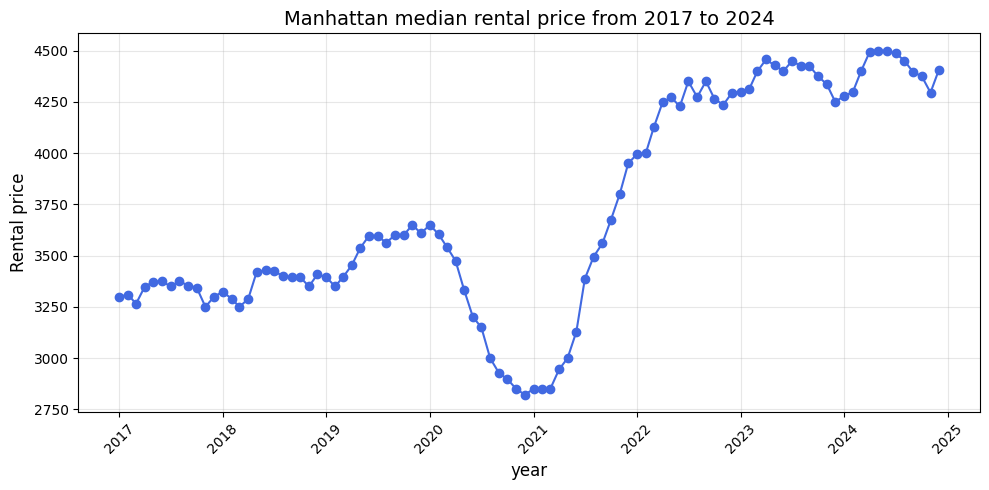

In [151]:
plt.figure(figsize=(10, 5))
plt.plot(median_df_man.index, median_df_man['median_price'],
         marker='o', linestyle='-', color='royalblue')

plt.title('Manhattan median rental price from 2017 to 2024', fontsize=14)
plt.xlabel('year', fontsize=12)
plt.ylabel('Rental price', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# excel is probably  better

## **Step 3.2 Brooklyn**

In [83]:
median_row = brooklyn.median(numeric_only=True)
median_row.head()

,0
2017-01,2295.0
2017-02,2300.0
2017-03,2300.0
2017-04,2300.0
2017-05,2300.0


In [84]:
median_row = median_row.to_frame().T

In [85]:
median_row.index = ['median_price']
median_row

,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
median_price,2295.0,2300.0,2300.0,2300.0,2300.0,2374.5,2450.0,2412.5,2450.5,2400.0,2390.0,2350.0,2300.0,2300.0,2399.5,2437.5,2500.0,2500.0,2567.0,2492.5,2550.0,2400.0,2400.0,2400.0,2250.0,2399.0,2400.0,2422.5,2525.0,2500.0,2500.0,2600.0,2398.0,2544.5,2500.0,2475.0,2525.0,2525.0,2550.0,2539.0,2525.0,2499.5,2499.0,2475.0,2400.0,2300.0,2300.0,2251.0,2250.0,2280.0,2269.0,2300.0,2213.0,2400.0,2425.0,2415.0,2424.5,2450.0,2534.0,2619.5,2533.0,2600.0,2651.0,2825.0,2997.5,2956.5,3200.0,3200.0,3000.0,3000.0,2975.0,2975.5,3000.0,3000.0,3000.0,3072.5,3075.0,3175.0,3100.0,3200.0,3100.0,3150.0,3000.0,3000.0,3000.0,3080.0,3052.5,3200.0,3299.0,3300.0,3315.5,3300.0,3300.0,3250.0,3222.5,3200.0


In [86]:
brooklyn = pd.concat([brooklyn, median_row], axis=0)

In [87]:
brooklyn
# when calculating the median, the Nan was excluded automatically

,areaName,Borough,areaType,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
7,Bath Beach,Brooklyn,neighborhood,2100.0,1950.0,1850.0,1950.0,1950.0,2000.0,1975.0,1950.0,1850.0,1898.0,2000.0,1848.0,1875.0,1950.0,2000.0,2023.0,2000.0,1850.0,1700.0,1675.0,1675.0,1750.0,1725.0,1675.0,1700.0,1575.0,1695.0,1675.0,1695.0,1750.0,1799.0,1795.0,1795.0,1850.0,1795.0,1795.0,1795.0,1900.0,2025.0,NaN,1875.0,1800.0,1900.0,2075.0,1795.0,1700.0,1785.0,1695.0,1698.0,1750.0,1799.0,1750.0,1733.0,1799.0,1700.0,1750.0,1699.0,1699.0,1750.0,1750.0,1750.0,1675.0,1850.0,1850.0,1850.0,1795.0,1800.0,1860.0,2075.0,1994.0,1725.0,1700.0,1750.0,1960.0,1982.0,2150.0,2300.0,1900.0,1975.0,2250.0,2325.0,2249.0,2200.0,2200.0,2099.0,2200.0,2125.0,2299.0,2150.0,1975.0,1995.0,2099.0,2150.0,2050.0,1950.0,2500.0
9,Bay Ridge,Brooklyn,neighborhood,2000.0,2000.0,1950.0,1975.0,2000.0,2000.0,2000.0,1895.0,1895.0,1900.0,1825.0,1850.0,2000.0,1995.0,1900.0,1963.0,1950.0,1950.0,1850.0,1995.0,2000.0,2000.0,1980.0,1900.0,1900.0,1999.0,2000.0,1980.0,1950.0,1900.0,1900.0,1950.0,1895.0,1900.0,2000.0,1925.0,1900.0,2000.0,2100.0,2050.0,1997.0,2000.0,2000.0,1950.0,1950.0,1850.0,1800.0,1775.0,1750.0,1750.0,1800.0,1750.0,1750.0,1750.0,1750.0,1800.0,1795.0,1775.0,1800.0,1775.0,1850.0,1900.0,1900.0,2000.0,2150.0,2250.0,2175.0,2338.0,2300.0,2200.0,2100.0,2200.0,2350.0,2300.0,2200.0,2150.0,2200.0,2299.0,2275.0,2388.0,2500.0,2400.0,2395.0,2400.0,2275.0,2300.0,2250.0,2250.0,2300.0,2400.0,2450.0,2400.0,2400.0,2300.0,2350.0,2350.0
13,Bedford-Stuyvesant,Brooklyn,neighborhood,2400.0,2350.0,2348.0,2395.0,2400.0,2475.0,2475.0,2475.0,2450.0,2400.0,2400.0,2350.0,2350.0,2300.0,2395.0,2450.0,2500.0,2500.0,2567.0,2585.0,2550.0,2500.0,2475.0,2475.0,2429.0,2450.0,2500.0,2500.0,2550.0,2523.0,2599.0,2600.0,2600.0,2650.0,2618.0,2545.0,2582.0,2537.0,2537.0,2539.0,2550.0,2550.0,2500.0,2500.0,2400.0,2300.0,2300.0,2250.0,2250.0,2250.0,2269.0,2300.0,2383.0,2475.0,2599.0,2650.0,2700.0,2700.0,2767.0,2800.0,2894.0,2897.0,2850.0,2875.0,3000.0,3050.0,3200.0,3200.0,3150.0,3100.0,3000.0,2995.0,3000.0,2999.0,3000.0,3100.0,3200.0,3295.0,3250.0,3200.0,3100.0,3099.0,3000.0,3000.0,3000.0,3100.0,3150.0,3200.0,3299.0,3300.0,3331.0,3300.0,3300.0,3250.0,3200.0,3200.0
16,Bensonhurst,Brooklyn,neighborhood,2000.0,1848.0,1800.0,1800.0,1700.0,1775.0,1700.0,1875.0,1725.0,1738.0,1700.0,1750.0,1700.0,1750.0,1800.0,1800.0,1880.0,1865.0,1700.0,1850.0,1900.0,1850.0,1875.0,1900.0,1850.0,1850.0,1900.0,1813.0,1900.0,1795.0,1700.0,1700.0,1700.0,1750.0,1750.0,1850.0,1963.0,1995.0,1999.0,1787.0,1700.0,1750.0,1674.0,1800.0,1800.0,1700.0,1600.0,1537.0,1550.0,1649.0,1750.0,1650.0,1650.0,1700.0,1695.0,1700.0,1750.0,1750.0,1699.0,1795.0,1825.0,2000.0,1850.0,2150.0,2000.0,2000.0,2100.0,2199.0,1975.0,2000.0,2000.0,2375.0,2375.0,2375.0,2200.0,2250.0,2000.0,2000.0,2200.0,2138.0,2150.0,2100.0,2047.0,2200.0,2000.0,2200.0,2200.0,2100.0,2300.0,2249.0,2195.0,2200.0,2400.0,2300.0,2100.0,2438.0
17,Bergen Beach,Brooklyn,neighborhood,2000.0,2000.0,2000.0,2000.0,NaN,NaN,NaN,2299.0,NaN,2200.0,2150.0,2050.0,NaN,NaN,NaN,NaN,2175.0,2275.0,2300.0,2150.0,2225.0,2063.0,2325.0,2300.0,2225.0,2100.0,2100.0,2100.0,NaN,NaN,NaN,NaN,2200.0,2150.0,2348.0,2448.0,NaN,2500.0,NaN,NaN,NaN,NaN,NaN,2450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025.0,1999.0,2150.0,NaN,2200.

In [91]:
median_series_bk = brooklyn.iloc[-1, 3:]
median_df_bk = median_series_bk.to_frame(name='median_price').reset_index()
median_df_bk.columns = ['date', 'median_price']

In [92]:
median_df_bk.head()

,date,median_price
0,2017-01,2295.0
1,2017-02,2300.0
2,2017-03,2300.0
3,2017-04,2300.0
4,2017-05,2300.0


In [93]:
type(median_df_bk.date[0])

str

In [94]:
median_df_bk['date'] = pd.to_datetime(median_df_bk['date'], format='%Y-%m')
median_df_bk.set_index('date', inplace=True)

In [96]:
median_df_bk.head()

,median_price
date,
2017-01-01,2295.0
2017-02-01,2300.0
2017-03-01,2300.0
2017-04-01,2300.0
2017-05-01,2300.0


## **Step 3.3 Bronx**

In [102]:
median_row = bronx.median(numeric_only=True)
median_row = median_row.to_frame().T
median_row.index = ['median_price']
bronx = pd.concat([bronx, median_row], axis=0)

In [103]:
bronx
# when calculating the median, the Nan was excluded automatically

,areaName,Borough,areaType,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
10,Baychester,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Bedford Park,Bronx,neighborhood,1400.0,1400.0,1500.0,1500.0,1550.0,1550.0,1550.0,1550.0,1550.0,1525.0,1583.0,1600.0,1495.0,1325.0,1550.0,1598.0,1470.0,1525.0,1550.0,1550.0,1425.0,1795.0,1600.0,1820.0,1833.0,1650.0,1650.0,1550.0,1605.0,1595.0,1600.0,1775.0,1786.0,1750.0,1750.0,1699.0,1699.0,2008.0,1625.0,NaN,NaN,NaN,1648.0,1695.0,1700.0,1650.0,1688.0,1625.0,1725.0,1662.0,1850.0,1695.0,1625.0,1625.0,1638.0,1625.0,1902.0,1775.0,1616.0,1650.0,1700.0,1795.0,1895.0,1875.0,1773.0,1750.0,1776.0,2298.0,1795.0,1795.0,1700.0,1702.0,1700.0,1600.0,1900.0,1950.0,1900.0,1750.0,1923.0,1973.0,1950.0,1900.0,1900.0,1895.0,1895.0,1922.0,2052.0,1927.0,1879.0,1995.0,1995.0,2011.0,1998.0,1888.0,1923.0,1995.0
15,Belmont,Bronx,neighborhood,1660.0,1670.0,1700.0,1675.0,1690.0,1700.0,1725.0,1775.0,1800.0,1800.0,1725.0,1613.0,1625.0,1650.0,1613.0,1725.0,1850.0,1950.0,1879.0,1840.0,2100.0,2100.0,1813.0,1725.0,1998.0,2200.0,2225.0,1850.0,1938.0,1850.0,2050.0,2400.0,2200.0,2200.0,2200.0,1850.0,1800.0,1800.0,1688.0,1695.0,2500.0,2298.0,2295.0,2295.0,2100.0,2075.0,2125.0,2225.0,2200.0,2223.0,2100.0,2200.0,2215.0,2000.0,2025.0,2150.0,2000.0,2199.0,2300.0,1850.0,1600.0,1875.0,1792.0,2000.0,2625.0,2200.0,1940.0,2300.0,2250.0,2250.0,2500.0,2375.0,2450.0,2810.0,2770.0,2770.0,2450.0,2810.0,3150.0,2450.0,2595.0,2219.0,1995.0,2698.0,3100.0,3100.0,3100.0,2900.0,3150.0,3100.0,3525.0,2850.0,3100.0,2395.0,3100.0,2898.0
22,Bronx,Bronx,borough,1678.0,1675.0,1750.0,1700.0,1725.0,1725.0,1750.0,1750.0,1750.0,1795.0,1787.0,1748.0,1787.0,1800.0,1850.0,1900.0,1900.0,1900.0,1895.0,1879.0,1900.0,1900.0,1849.0,1860.0,1899.0,1850.0,1875.0,1895.0,1895.0,1900.0,1908.0,1950.0,2000.0,1988.0,1950.0,1935.0,1950.0,1982.0,1999.0,2000.0,1997.0,1999.0,2000.0,1995.0,1995.0,1950.0,1925.0,1900.0,1925.0,1950.0,1935.0,1975.0,2000.0,2000.0,2050.0,2100.0,2050.0,2050.0,2100.0,2100.0,2095.0,2197.0,2200.0,2150.0,2250.0,2250.0,2300.0,2300.0,2299.0,2295.0,2295.0,2250.0,2250.0,2350.0,2300.0,2450.0,2500.0,2575.0,2575.0,2600.0,2650.0,2519.0,2550.0,2500.0,2600.0,2624.0,2650.0,2750.0,2900.0,2900.0,2854.0,2865.0,2900.0,2925.0,2858.0,2850.0
23,Bronxwood,Bronx,neighborhood,1500.0,1538.0,1525.0,1525.0,1650.0,1500.0,1500.0,1600.0,1525.0,1475.0,1500.0,1500.0,1675.0,1575.0,1525.0,1513.0,1750.0,1550.0,1585.0,1575.0,1550.0,1610.0,1595.0,1700.0,1650.0,1598.0,1650.0,1625.0,1750.0,1895.0,1625.0,1750.0,2273.0,1950.0,1700.0,1695.0,1675.0,1645.0,NaN,NaN,NaN,NaN,NaN,1700.0,1725.0,1648.0,1548.0,1623.0,1625.0,1545.0,1845.0,1603.0,1695.0,1673.0,1625.0,1669.0,1695.0,1650.0,1900.0,1685.0,1675.0,1800.0,1700.0,1975.0,1975.0,1950.0,1838.0,1775.0,1763.0,1725.0,1675.0,1675.0,1638.0,2000.0,1913.0,2150.0,1875.0,2150.0,2150.0,2075.0,2248.0,2300.0,NaN,NaN,2395.0,NaN,NaN,NaN,1713.0,NaN,NaN,NaN,NaN,2172.0,2128.0,NaN
32,Castle Hill,Bronx,neighborhood,

In [107]:
median_series_br = bronx.iloc[-1, 3:]
median_df_br = median_series_br.to_frame(name='median_price').reset_index()
median_df_br.columns = ['date', 'median_price']
median_df_br['date'] = pd.to_datetime(median_df_br['date'], format='%Y-%m')
median_df_br.set_index('date', inplace=True)

In [108]:
median_df_br.head()

,median_price
date,
2017-01-01,1510.0
2017-02-01,1612.5
2017-03-01,1700.0
2017-04-01,1675.0
2017-05-01,1680.0


## **Step 3.4 Queens**

In [109]:
median_row = queens.median(numeric_only=True)
median_row = median_row.to_frame().T
median_row.index = ['median_price']
queens = pd.concat([queens, median_row], axis=0)

In [110]:
queens
# when calculating the median, the Nan was excluded automatically

,areaName,Borough,areaType,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
5,Astoria,Queens,neighborhood,2250.0,2200.0,2200.0,2200.0,2200.0,2250.0,2300.0,2300.0,2250.0,2195.0,2200.0,2195.0,2150.0,2123.0,2100.0,2100.0,2200.0,2200.0,2246.0,2250.0,2250.0,2200.0,2175.0,2150.0,2199.0,2200.0,2200.0,2200.0,2268.0,2300.0,2350.0,2350.0,2350.0,2350.0,2300.0,2300.0,2333.0,2395.0,2300.0,2300.0,2280.0,2250.0,2200.0,2163.0,2100.0,2000.0,2000.0,1995.0,1950.0,1950.0,1925.0,1950.0,1999.0,2000.0,2100.0,2200.0,2200.0,2200.0,2200.0,2250.0,2258.0,2300.0,2350.0,2373.0,2500.0,2600.0,2650.0,2700.0,2795.0,2695.0,2600.0,2600.0,2695.0,2695.0,2750.0,2750.0,2750.0,2800.0,2878.0,2900.0,2850.0,2850.0,2833.0,2833.0,2800.0,2858.0,2900.0,2900.0,2950.0,2950.0,2950.0,2993.0,2900.0,2900.0,2900.0,2800.0
6,Auburndale,Queens,neighborhood,1995.0,2195.0,2195.0,2295.0,2095.0,2195.0,2048.0,1895.0,1995.0,1495.0,1795.0,2325.0,2300.0,2300.0,2300.0,2200.0,2095.0,2098.0,2095.0,2095.0,2048.0,1995.0,1995.0,1948.0,2045.0,2045.0,1995.0,1998.0,1998.0,1900.0,1650.0,2198.0,2100.0,2100.0,2177.0,1900.0,1895.0,2000.0,1998.0,NaN,1998.0,1995.0,1823.0,2000.0,2095.0,2073.0,2000.0,2152.0,2212.0,2100.0,2195.0,2000.0,2000.0,2195.0,2125.0,NaN,2615.0,2407.0,NaN,NaN,NaN,NaN,2500.0,2400.0,2500.0,2557.0,2514.0,2600.0,NaN,2400.0,NaN,NaN,2450.0,2700.0,2100.0,2050.0,2275.0,2275.0,2495.0,2937.0,2887.0,2887.0,NaN,2350.0,2350.0,NaN,3175.0,2850.0,2850.0,2650.0,2400.0,2363.0,2250.0,2299.0,NaN,2650.0
11,Bayside,Queens,neighborhood,2500.0,2549.0,2500.0,2400.0,2400.0,2400.0,2400.0,2375.0,2450.0,2450.0,2375.0,2210.0,2500.0,2350.0,2300.0,2300.0,2300.0,2388.0,2400.0,2475.0,2350.0,2475.0,2350.0,2100.0,2150.0,2200.0,2150.0,2050.0,2000.0,2100.0,2000.0,2150.0,2200.0,2175.0,2125.0,2150.0,2100.0,1900.0,2000.0,1875.0,1975.0,2170.0,2125.0,2063.0,2000.0,1988.0,2000.0,2050.0,2000.0,1995.0,1863.0,1850.0,1850.0,2075.0,2063.0,2200.0,2200.0,2200.0,2100.0,2050.0,2100.0,2200.0,2225.0,2500.0,2300.0,2500.0,2395.0,2300.0,2300.0,2600.0,2500.0,2500.0,2463.0,2500.0,2500.0,2650.0,2350.0,2325.0,2700.0,2600.0,2700.0,2500.0,2500.0,2500.0,2500.0,2500.0,2495.0,2495.0,2500.0,2600.0,2800.0,2800.0,2800.0,2900.0,2925.0,2800.0
14,Bellerose,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1725.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Briarwood,Queens,neighborhood,1650.0,1663.0,1700.0,1720.0,1700.0,1700.0,1713.0,1773.0,1700.0,1797.0,1849.0,1797.0,1795.0,1725.0,1798.0,1800.0,1720.0,1749.0,1750.0,1699.0,1750.0,1769.0,1750.0,1830.0,1775.0,1715.0,1795.0,1748.0,1750.0,1825.0,1757.0,1750.0,1875.0,1850.0,1850.0,1750.0,1795.0,1775.0,1786.0,1726.0,1700.0,1785.0,1795.0,1727.0,1750.0,1763.0,1725.0,1725.0,1725.0,1725.0,1725.0,1725.0,1725.0,1725.0,1725.0,1725.0,1725.0,1725.0,1725.0,1798.0,1875.0,1850.0,1950.0,1895.0,1895.0,1850.0,1863.0,1900.0,1995.0,1925.0,1875.0,1875.0,1875.0,1923.0,1895.0,1880.0,1900.0,1985.0,2200.0,2000.0,1995.0,1995.0,1900.0,1900.0,1948.0,1913.0,2053.0,2050.0,1950.0,1950.0,2199.0,2100.0,2020.0,2045.0,1995.0,2050.0
...,..

In [116]:
median_series_queens = queens.iloc[-1, 3:]
median_df_queens = median_series_queens.to_frame(name='median_price').reset_index()
median_df_queens.columns = ['date', 'median_price']
median_df_queens['date'] = pd.to_datetime(median_df_queens['date'], format='%Y-%m')
median_df_queens.set_index('date', inplace=True)

In [117]:
median_df_queens.head()

,median_price
date,
2017-01-01,1995.0
2017-02-01,2037.0
2017-03-01,1987.5
2017-04-01,2000.0
2017-05-01,2000.0


## **Step 3.5 Staten Island**

In [121]:
staten_island = rent_df[rent_df['Borough'] == 'Staten Island']
staten_island

,areaName,Borough,areaType,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
172,Staten Island,Staten Island,borough,1950.0,1900.0,1900.0,1918.0,2000.0,2033.0,1950.0,1950.0,1790.0,1875.0,1900.0,1925.0,1800.0,1842.0,1800.0,1825.0,1829.0,1894.0,1950.0,2000.0,2000.0,1865.0,1959.0,1865.0,1853.0,1850.0,1890.0,1875.0,2050.0,2050.0,2000.0,2045.0,2200.0,2200.0,2200.0,2000.0,1952.0,1998.0,2123.0,1831.0,1833.0,1900.0,1900.0,1850.0,1863.0,1950.0,1995.0,2150.0,1950.0,1900.0,1873.0,2000.0,1950.0,1849.0,1849.0,2000.0,2025.0,2125.0,2000.0,2060.0,2050.0,1932.0,1914.0,1950.0,1950.0,1950.0,2025.0,2100.0,2250.0,2200.0,2100.0,2050.0,2095.0,2175.0,2200.0,2200.0,2000.0,2000.0,1899.0,2000.0,2050.0,2050.0,2225.0,2250.0,2548.0,2500.0,2500.0,2513.0,2700.0,2600.0,2625.0,2700.0,2850.0,2750.0,2700.0,2397.0


In [122]:
median_row = staten_island.median(numeric_only=True)
median_row = median_row.to_frame().T
median_row.index = ['median_price']
staten_island = pd.concat([staten_island, median_row], axis=0)

In [123]:
staten_island
# when calculating the median, the Nan was excluded automatically

,areaName,Borough,areaType,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
172,Staten Island,Staten Island,borough,1950.0,1900.0,1900.0,1918.0,2000.0,2033.0,1950.0,1950.0,1790.0,1875.0,1900.0,1925.0,1800.0,1842.0,1800.0,1825.0,1829.0,1894.0,1950.0,2000.0,2000.0,1865.0,1959.0,1865.0,1853.0,1850.0,1890.0,1875.0,2050.0,2050.0,2000.0,2045.0,2200.0,2200.0,2200.0,2000.0,1952.0,1998.0,2123.0,1831.0,1833.0,1900.0,1900.0,1850.0,1863.0,1950.0,1995.0,2150.0,1950.0,1900.0,1873.0,2000.0,1950.0,1849.0,1849.0,2000.0,2025.0,2125.0,2000.0,2060.0,2050.0,1932.0,1914.0,1950.0,1950.0,1950.0,2025.0,2100.0,2250.0,2200.0,2100.0,2050.0,2095.0,2175.0,2200.0,2200.0,2000.0,2000.0,1899.0,2000.0,2050.0,2050.0,2225.0,2250.0,2548.0,2500.0,2500.0,2513.0,2700.0,2600.0,2625.0,2700.0,2850.0,2750.0,2700.0,2397.0
median_price,NaN,NaN,NaN,1950.0,1900.0,1900.0,1918.0,2000.0,2033.0,1950.0,1950.0,1790.0,1875.0,1900.0,1925.0,1800.0,1842.0,1800.0,1825.0,1829.0,1894.0,1950.0,2000.0,2000.0,1865.0,1959.0,1865.0,1853.0,1850.0,1890.0,1875.0,2050.0,2050.0,2000.0,2045.0,2200.0,2200.0,2200.0,2000.0,1952.0,1998.0,2123.0,1831.0,1833.0,1900.0,1900.0,1850.0,1863.0,1950.0,1995.0,2150.0,1950.0,1900.0,1873.0,2000.0,1950.0,1849.0,1849.0,2000.0,2025.0,2125.0,2000.0,2060.0,2050.0,1932.0,1914.0,1950.0,1950.0,1950.0,2025.0,2100.0,2250.0,2200.0,2100.0,2050.0,2095.0,2175.0,2200.0,2200.0,2000.0,2000.0,1899.0,2000.0,2050.0,2050.0,2225.0,2250.0,2548.0,2500.0,2500.0,2513.0,2700.0,2600.0,2625.0,2700.0,2850.0,2750.0,2700.0,2397.0


In [124]:
median_series_si = staten_island.iloc[-1, 3:]
median_df_si = median_series_si.to_frame(name='median_price').reset_index()
median_df_si.columns = ['date', 'median_price']
median_df_si['date'] = pd.to_datetime(median_df_si['date'], format='%Y-%m')
median_df_si.set_index('date', inplace=True)

In [125]:
median_df_si.head()

,median_price
date,
2017-01-01,1950.0
2017-02-01,1900.0
2017-03-01,1900.0
2017-04-01,1918.0
2017-05-01,2000.0


In [ ]:
# names: median_df_bk, median_df_br, median_df_man, median_df_queens, median_df_si

In [154]:
median_df_bk.T
# excel

date,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01,2024-01-01,2024-02-01,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01
median_price,2295.0,2300.0,2300.0,2300.0,2300.0,2374.5,2450.0,2412.5,2450.5,2400.0,2390.0,2350.0,2300.0,2300.0,2399.5,2437.5,2500.0,2500.0,2567.0,2492.5,2550.0,2400.0,2400.0,2400.0,2250.0,2399.0,2400.0,2422.5,2525.0,2500.0,2500.0,2600.0,2398.0,2544.5,2500.0,2475.0,2525.0,2525.0,2550.0,2539.0,2525.0,2499.5,2499.0,2475.0,2400.0,2300.0,2300.0,2251.0,2250.0,2280.0,2269.0,2300.0,2213.0,2400.0,2425.0,2415.0,2424.5,2450.0,2534.0,2619.5,2533.0,2600.0,2651.0,2825.0,2997.5,2956.5,3200.0,3200.0,3000.0,3000.0,2975.0,2975.5,3000.0,3000.0,3000.0,3072.5,3075.0,3175.0,3100.0,3200.0,3100.0,3150.0,3000.0,3000.0,3000.0,3080.0,3052.5,3200.0,3299.0,3300.0,3315.5,3300.0,3300.0,3250.0,3222.5,3200.0


In [131]:
median_df_br.T

date,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01,2024-01-01,2024-02-01,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01
median_price,1510.0,1612.5,1700.0,1675.0,1680.0,1650.0,1650.0,1700.0,1700.0,1700.0,1716.5,1613.0,1691.5,1718.0,1737.5,1800.0,1800.0,1819.0,1785.0,1800.0,1800.0,1898.0,1750.0,1790.0,1806.0,1800.0,1800.0,1775.0,1800.0,1850.0,1874.0,1862.5,1899.0,1862.0,1884.0,1872.5,1838.0,1874.5,1900.0,1952.0,1860.0,1875.0,1900.0,1794.0,1777.0,1835.0,1849.0,1725.0,1825.0,1770.5,1847.5,1825.0,1899.0,1850.0,1913.5,1900.0,1888.0,1937.5,1995.0,1896.0,1800.0,1825.0,1895.0,1887.5,1950.0,2100.0,1995.0,2200.0,1991.0,1950.0,1950.0,2051.5,2100.0,2174.0,2175.0,2187.5,2150.0,2349.0,2242.5,2237.5,2311.5,2300.0,2299.0,2150.0,2250.0,2386.5,2162.0,2374.0,2383.0,2150.0,2599.0,2500.0,2412.5,2395.0,2495.0,2362.5


In [153]:
median_df_man.T

date,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01,2024-01-01,2024-02-01,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01
median_price,3299.0,3310.5,3265.0,3349.0,3371.5,3375.0,3350.0,3375.0,3354.0,3344.5,3250.0,3300.0,3323.5,3290.0,3250.0,3290.0,3422.5,3428.0,3425.0,3400.0,3395.0,3395.0,3350.0,3409.0,3395.0,3350.0,3395.0,3453.0,3537.5,3597.5,3595.0,3563.0,3602.0,3600.0,3650.0,3608.5,3650.0,3604.5,3543.0,3475.0,3333.5,3201.5,3150.0,3000.0,2928.0,2897.5,2850.0,2822.0,2849.5,2850.0,2850.0,2945.0,3000.0,3129.0,3387.5,3495.0,3560.0,3675.0,3800.0,3950.0,3995.0,4000.0,4125.0,4247.0,4272.5,4227.5,4350.0,4273.0,4350.0,4264.5,4235.0,4292.5,4300.0,4313.0,4398.0,4456.5,4427.5,4400.0,4447.5,4426.5,4425.0,4375.0,4336.0,4250.0,4277.5,4297.5,4399.0,4495.0,4500.0,4497.5,4487.5,4450.0,4394.5,4375.0,4295.0,4407.5


In [133]:
median_df_si.T

date,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01,2024-01-01,2024-02-01,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01
median_price,1950.0,1900.0,1900.0,1918.0,2000.0,2033.0,1950.0,1950.0,1790.0,1875.0,1900.0,1925.0,1800.0,1842.0,1800.0,1825.0,1829.0,1894.0,1950.0,2000.0,2000.0,1865.0,1959.0,1865.0,1853.0,1850.0,1890.0,1875.0,2050.0,2050.0,2000.0,2045.0,2200.0,2200.0,2200.0,2000.0,1952.0,1998.0,2123.0,1831.0,1833.0,1900.0,1900.0,1850.0,1863.0,1950.0,1995.0,2150.0,1950.0,1900.0,1873.0,2000.0,1950.0,1849.0,1849.0,2000.0,2025.0,2125.0,2000.0,2060.0,2050.0,1932.0,1914.0,1950.0,1950.0,1950.0,2025.0,2100.0,2250.0,2200.0,2100.0,2050.0,2095.0,2175.0,2200.0,2200.0,2000.0,2000.0,1899.0,2000.0,2050.0,2050.0,2225.0,2250.0,2548.0,2500.0,2500.0,2513.0,2700.0,2600.0,2625.0,2700.0,2850.0,2750.0,2700.0,2397.0


In [135]:
median_df_queens.T

date,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01,2024-01-01,2024-02-01,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01
median_price,1995.0,2037.0,1987.5,2000.0,2000.0,2150.0,2100.0,2000.0,1995.0,1997.0,1981.5,1992.0,2000.0,1950.0,2000.0,2036.5,1985.0,2050.0,2081.5,2072.5,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2012.0,2000.0,1999.0,2050.0,2100.0,2050.0,2100.0,2075.0,2050.0,2000.0,2000.0,2100.0,2162.5,2100.0,2036.5,2000.0,2051.5,2000.0,2000.0,1978.0,2000.0,1995.0,1925.0,1950.0,1937.5,1950.0,2000.0,2025.0,2000.0,2050.0,2100.0,2100.0,2100.0,2064.0,2150.0,2174.5,2200.0,2295.0,2300.0,2400.0,2350.0,2405.5,2400.0,2400.0,2399.5,2387.0,2362.5,2499.0,2495.0,2450.0,2475.0,2496.5,2499.5,2600.0,2560.0,2599.0,2574.5,2500.0,2592.0,2511.5,2588.0,2657.0,2650.0,2687.0,2624.0,2650.0,2598.0,2675.0,2640.0,2650.0


## **Step 3.6 All Boroughs' medians**

In [156]:
rent_df.head()

,areaName,Borough,areaType,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
0,All Downtown,Manhattan,submarket,3650.0,3700.0,3695.0,3700.0,3785.0,3723.0,3725.0,3700.0,3653.0,3662.0,3673.0,3620.0,3650.0,3750.0,3735.0,3750.0,3837.0,3800.0,3795.0,3800.0,3825.0,3800.0,3850.0,3799.0,3800.0,3850.0,3800.0,3938.0,4000.0,4050.0,4000.0,3995.0,4000.0,4050.0,4050.0,4000.0,4000.0,3999.0,3995.0,3851.0,3700.0,3605.0,3500.0,3395.0,3295.0,3200.0,3140.0,3150.0,3150.0,3195.0,3200.0,3215.0,3350.0,3595.0,3800.0,4000.0,4195.0,4300.0,4361.0,4400.0,4500.0,4595.0,4595.0,4725.0,4800.0,4770.0,4800.0,4800.0,4875.0,4850.0,4795.0,4800.0,4827.0,4950.0,4800.0,4875.0,4950.0,4950.0,4895.0,4811.0,4848.0,4700.0,4700.0,4750.0,4800.0,4850.0,4895.0,4953.0,5000.0,4995.0,4950.0,4900.0,4900.0,4925.0,4895.0,4902.0
1,All Midtown,Manhattan,submarket,3470.0,3495.0,3462.0,3500.0,3501.0,3530.0,3500.0,3500.0,3500.0,3500.0,3350.0,3350.0,3380.0,3395.0,3390.0,3450.0,3500.0,3500.0,3500.0,3500.0,3500.0,3529.0,3500.0,3550.0,3500.0,3550.0,3537.0,3578.0,3625.0,3675.0,3700.0,3700.0,3700.0,3685.0,3701.0,3700.0,3700.0,3700.0,3693.0,3555.0,3382.0,3245.0,3100.0,3000.0,2975.0,2900.0,2895.0,2895.0,2900.0,2931.0,2995.0,3000.0,3159.0,3267.0,3495.0,3600.0,3850.0,3950.0,4095.0,4150.0,4303.0,4320.0,4300.0,4395.0,4400.0,4395.0,4450.0,4293.0,4350.0,4282.0,4255.0,4350.0,4355.0,4491.0,4486.0,4540.0,4500.0,4500.0,4495.0,4500.0,4485.0,4350.0,4300.0,4327.0,4432.0,4407.0,4400.0,4495.0,4550.0,4505.0,4500.0,4500.0,4475.0,4440.0,4400.0,4500.0
2,All Upper East Side,Manhattan,submarket,2995.0,2995.0,2927.0,2950.0,2950.0,2950.0,2950.0,2900.0,2995.0,2950.0,2995.0,2990.0,2900.0,2895.0,2850.0,2850.0,2850.0,2900.0,2915.0,2900.0,2895.0,2995.0,2995.0,3000.0,3000.0,3000.0,2995.0,2995.0,3000.0,3050.0,3050.0,2995.0,3000.0,3100.0,3208.0,3295.0,3275.0,3250.0,3250.0,3150.0,3058.0,2950.0,2800.0,2700.0,2650.0,2500.0,2495.0,2500.0,2450.0,2475.0,2400.0,2400.0,2475.0,2500.0,2550.0,2700.0,2850.0,2950.0,3200.0,3393.0,3450.0,3550.0,3400.0,3400.0,3500.0,3500.0,3550.0,3750.0,3750.0,3800.0,3848.0,3827.0,3900.0,4000.0,4000.0,3995.0,4000.0,4000.0,4000.0,3995.0,4000.0,3995.0,4000.0,3950.0,3950.0,3995.0,3950.0,3900.0,3935.0,3900.0,3950.0,3900.0,3900.0,3900.0,3950.0,3945.0
3,All Upper Manhattan,Manhattan,submarket,2350.0,2300.0,2296.0,2337.0,2350.0,2350.0,2395.0,2395.0,2354.0,2350.0,2261.0,2295.0,2275.0,2295.0,2309.0,2350.0,2383.0,2400.0,2449.0,2400.0,2350.0,2350.0,2300.0,2300.0,2300.0,2345.0,2375.0,2400.0,2450.0,2500.0,2500.0,2495.0,2450.0,2395.0,2350.0,2350.0,2392.0,2400.0,2450.0,2470.0,2445.0,2425.0,2400.0,2350.0,2295.0,2250.0,2211.0,2200.0,2200.0,2180.0,2192.0,2200.0,2250.0,2295.0,2300.0,2300.0,2300.0,2300.0,2300.0,2350.0,2399.0,2400.0,2422.0,2500.0,2550.0,2700.0,2793.0,2750.0,2700.0,2700.0,2650.0,2600.0,2650.0,2695.0,2704.0,2800.0,2838.0,2950.0,2900.0,2900.0,2850.0,2800.0,2800.0,2795.0,2800.0,2900.0,2850.0,2995.0,3000.0,3000.0,3050.0,3000.0,2900.0,2850.0,2850.0,2850.0
4,All Upper West Side,Manhattan,submarket,3299.0,3300.0,3265.0,3295.0,3300.0,3350.0,3350.0,3375.0,3354.0,3389.0,3319.0,3344.0,3350.0,3290.0,3250.0,3290.0,3300.0,3350.0,3319.0,3313.0,3395.0,3395.0,3350.0,3398.0,3395.0,3350.0,3395.0,3453.0,3483.0,3450.0,3400.0,3500.0,3602.0,3600.0,3650.0,3570.0,3650.0,3589.0,3543.0,3419.0,3300.0,3200.0,3150.0,3000.0,2928.0,2825.0,

In [157]:
median_row = rent_df.median(numeric_only=True)
median_row = median_row.to_frame().T
median_row.index = ['median_price']
rent_df = pd.concat([rent_df, median_row], axis=0)

In [159]:
rent_df.tail()
# when calculating the median, the Nan was excluded automatically

,areaName,Borough,areaType,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
194,Woodhaven,Queens,neighborhood,1595.0,1675.0,1750.0,1995.0,2100.0,1750.0,1700.0,1775.0,2000.0,1995.0,NaN,2188.0,2000.0,2100.0,2175.0,1736.0,1650.0,1725.0,1900.0,1788.0,1725.0,1825.0,1850.0,1742.0,1746.0,1950.0,1950.0,1800.0,1750.0,1725.0,1750.0,1788.0,1788.0,1745.0,1800.0,1725.0,1800.0,1850.0,NaN,NaN,1850.0,1773.0,1838.0,2100.0,2000.0,1838.0,1923.0,2100.0,2000.0,1725.0,1713.0,2350.0,2350.0,1700.0,1697.0,1750.0,2350.0,2200.0,2250.0,2299.0,2200.0,2300.0,2300.0,2288.0,2450.0,2000.0,2400.0,2075.0,2075.0,2313.0,2399.0,2250.0,2299.0,2150.0,2500.0,2500.0,2450.0,2100.0,2100.0,2200.0,2700.0,2750.0,2750.0,2400.0,2400.0,2225.0,2500.0,2500.0,2675.0,2775.0,2825.0,2800.0,2575.0,2450.0,2250.0,2200.0
195,Woodlawn,Bronx,neighborhood,NaN,NaN,1750.0,NaN,NaN,NaN,1625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,Woodside,Queens,neighborhood,1850.0,1900.0,1900.0,1900.0,1795.0,2040.0,2100.0,2050.0,2100.0,2000.0,1900.0,1985.0,1800.0,1775.0,1950.0,1975.0,1995.0,2050.0,1775.0,1865.0,1999.0,1879.0,1945.0,1895.0,1875.0,1850.0,1900.0,1900.0,1995.0,1998.0,2000.0,2000.0,2000.0,1890.0,2000.0,2075.0,1895.0,2098.0,2200.0,2000.0,1850.0,1975.0,1950.0,2000.0,1900.0,1899.0,1875.0,1850.0,1800.0,1800.0,1750.0,1750.0,1800.0,1852.0,1850.0,1900.0,2060.0,2000.0,1899.0,1875.0,2000.0,1950.0,2050.0,1926.0,1950.0,2200.0,2250.0,2250.0,2400.0,2330.0,2225.0,2278.0,2300.0,2400.0,2300.0,2500.0,2500.0,2700.0,2675.0,2813.0,2700.0,2960.0,3050.0,2775.0,2700.0,2700.0,2700.0,2664.0,2700.0,2980.0,3065.0,3058.0,3000.0,2985.0,2902.0,2950.0
197,Woodstock,Bronx,neighborhood,NaN,1825.0,2200.0,NaN,1650.0,NaN,1920.0,NaN,NaN,NaN,1790.0,NaN,NaN,NaN,NaN,2225.0,2240.0,2155.0,1650.0,1787.0,2250.0,1950.0,1950.0,1790.0,2200.0,2025.0,NaN,1950.0,1945.0,1948.0,1645.0,1888.0,1875.0,1888.0,1950.0,NaN,1950.0,1950.0,1950.0,NaN,NaN,NaN,1945.0,1971.0,1600.0,1825.0,1987.0,1963.0,1850.0,1558.0,1375.0,1800.0,2061.0,1838.0,1900.0,1800.0,1975.0,1725.0,1850.0,1875.0,1950.0,1950.0,NaN,1975.0,1950.0,NaN,1950.0,1800.0,1625.0,1800.0,2100.0,2000.0,1963.0,2125.0,2400.0,2500.0,2150.0,2600.0,2500.0,NaN,NaN,NaN,2625.0,NaN,NaN,2740.0,3100.0,NaN,NaN,NaN,2763.0,2550.0,3050.0,NaN,NaN,NaN
median_price,NaN,NaN,NaN,2200.0,2197.5,2196.0,2174.0,2100.0,2197.5,2200.0,2200.0,2200.0,2175.0,2112.5,2197.0,2149.0,2200.0,2250.0,2250.0,2200.0,2250.0,2275.0,2250.0,2225.0,2200.0,2169.0,2196.5,2195.0,2200.0,2200.0,2200.0,2250.0,2249.0,2262.5,2250.0,2280.0,2250.0,2300.0,2300.0,2299.0,2300.0,2365.0,2497.5,2425.0,2299.5,2295.0,2200.0,2200.0,2150.0,2137.5,2100.0,2100.0,2100.0,2100.0,2100.0,2150.0,2195.0,2200.0,2250.0,2287.5,2281.5,2275.0,2300.0,2300.0,2300.0,2362.5,2462.0,2500.0,2694.0,2600.0,2600.0,2650.0,2600.0,2600.0,2562.0,2598.0,2600.0,2648.0,2728.0,2700.0,2798.0,2849.0,2937.0,2881.0,2830.0,2800.0,2800.0,2898.0,2975.0,2961.5,2999.0,2997.5,3000.5,3050.0,3000.0,3000.0,2997.5,2941.5,2925.0


In [161]:
median_series_all = rent_df.iloc[-1, 3:]
median_df_all = median_series_all.to_frame(name='median_price').reset_index()
median_df_all.columns = ['date', 'median_price']
median_df_all['date'] = pd.to_datetime(median_df_all['date'], format='%Y-%m')
median_df_all.set_index('date', inplace=True)

In [164]:
median_df_all.head()

,median_price
date,
2017-01-01,2200.0
2017-02-01,2197.5
2017-03-01,2196.0
2017-04-01,2174.0
2017-05-01,2100.0


In [165]:
median_df_all.T

date,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01,2024-01-01,2024-02-01,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01
median_price,2200.0,2197.5,2196.0,2174.0,2100.0,2197.5,2200.0,2200.0,2200.0,2175.0,2112.5,2197.0,2149.0,2200.0,2250.0,2250.0,2200.0,2250.0,2275.0,2250.0,2225.0,2200.0,2169.0,2196.5,2195.0,2200.0,2200.0,2200.0,2250.0,2249.0,2262.5,2250.0,2280.0,2250.0,2300.0,2300.0,2299.0,2300.0,2365.0,2497.5,2425.0,2299.5,2295.0,2200.0,2200.0,2150.0,2137.5,2100.0,2100.0,2100.0,2100.0,2100.0,2150.0,2195.0,2200.0,2250.0,2287.5,2281.5,2275.0,2300.0,2300.0,2300.0,2362.5,2462.0,2500.0,2694.0,2600.0,2600.0,2650.0,2600.0,2600.0,2562.0,2598.0,2600.0,2648.0,2728.0,2700.0,2798.0,2849.0,2937.0,2881.0,2830.0,2800.0,2800.0,2898.0,2975.0,2961.5,2999.0,2997.5,3000.5,3050.0,3000.0,3000.0,2997.5,2941.5,2925.0


In [ ]:
# names: median_df_bk, median_df_br, median_df_man, median_df_queens, median_df_si, median_df_all